# Room acoustics
In this experiment we are going to investigate the effect of different room acoustics to the model performance.

In [2]:
from test_utils.imports import *

#### Load baseline model

In [4]:
model_name = 'Baseline_Case'
model_path = '../MODELS/cross-validation/Baseline_Case/'
m = joblib.load(model_path + model_name + '.pkl')

### Load MeldaProduction Rooms and MIT reverbs data as test set
* Here we will be using DI recordings from the Raw part of the Five Guitar dataset plus MeldaProduction Rooms and MIT augmented datasets audios.
* We are going to filter also major/minor third intervals.

In [5]:
dataset_path = '../Databases/'
loader_name = 'Loaders/Guitar_rooms_test.json'

loader = SEGMENTS_LOADER(dataset_path)
test_segments = loader.load_chromas_for_dataset(ex_2_id,loader_name, roll_to_c = False, segments = None)

with open(dataset_path+ loader_name) as af:
    test_audios = json.load(af)
    
# Filter third intervals
for i, k in enumerate(test_segments.kinds):
    if k == '+3' or k == '-3':
        test_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in test_segments.kinds]
test_segments = AnnotatedChromaSegments(
    test_segments.labels[is_defined],
    test_segments.pitches[is_defined],
    test_segments.kinds[is_defined],
    test_segments.chromas[is_defined],
    test_segments.uids[is_defined],
    test_segments.start_times[is_defined],
    test_segments.durations[is_defined])

print('Test set has {} chromas.'.format(test_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(test_segments.chromas[test_segments.kinds == k])))

Loaded 570 files.
Loading:  Raw_database/Lily_Telecaster_108_DI.wav
Loading:  Raw_database/Century_Larrivee_130_DI.wav
Loading:  Raw_database/Lily_Larrivee_108_DI.wav
Loading:  Raw_database/Mountain_Eastman_104_DI.wav
Loading:  Raw_database/Lily_Ibanez_108_DI.wav
Loading:  Raw_database/Century_Telecaster_130_DI.wav
Loading:  Raw_database/Where_Larrivee_100_DI.wav
Loading:  Raw_database/Hole_Larrivee_102_DI.wav
Loading:  Raw_database/Train_Epiphone_112_DI.wav
Loading:  Raw_database/Train_Eastman_112_DI.wav
Loading:  Raw_database/Train_Ibanez_112_DI.wav
Loading:  Raw_database/Hole_Eastman_102_DI.wav
Loading:  Raw_database/Century_Eastman_130_DI.wav
Loading:  Raw_database/Lily_Epiphone_108_DI.wav
Loading:  Raw_database/Mountain_Telecaster_104_DI.wav
Loading:  Raw_database/Where_Eastman_100_DI.wav
Loading:  Raw_database/Mountain_Ibanez_104_DI.wav
Loading:  Raw_database/Where_Telecaster_100_DI.wav
Loading:  Raw_database/Hole_Ibanez_102_DI.wav
Loading:  Raw_database/Mountain_Epiphone_104_DI.

Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Ibanez_108_Large2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Mountain_Larrivee_104_Small1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Ibanez_130_Small2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Telecaster_102_Large3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Telecaster_100_Small2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Mountain_Epiphone_104_Small1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Ibanez_102_Large2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Telecaster_130_Large3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Medium2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Train_Ibanez_112_Medium1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Mountain_Ibanez_104_Large1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Epiphone_102_Small3.wav
Loading:  Augmented_

Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Epiphone_108_Large2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Mountain_Larrivee_104_Medium2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Train_Epiphone_112_Small2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Mountain_Larrivee_104_Small2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Telecaster_100_Small3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Mountain_Eastman_104_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Larrivee_100_Large3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Eastman_130_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Telecaster_100_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Ibanez_130_Large3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Ibanez_102_Medium1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Larrivee_102_Large1.wav
Loading:  Augme

Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Larrivee_108_Large2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Train_Eastman_112_Small2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Eastman_108_Small1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Ibanez_100_Medium1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Train_Telecaster_112_Large2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Larrivee_108_Small2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Larrivee_108_Large1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Telecaster_100_Small1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Eastman_108_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Epiphone_102_Small1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Epiphone_130_Large1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Train_Larrivee_112_Large3.wav
Loading:  Augmented_database/Me

Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Larrivee_108_Medium2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Epiphone_130_Large2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Mountain_Telecaster_104_Medium2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Epiphone_100_Medium2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Train_Ibanez_112_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Epiphone_100_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Medium1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Train_Eastman_112_Large2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Small3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Epiphone_130_Medium1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Ibanez_100_Small2.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Larrivee_100_Medium1.wav
Loading:  Augme

Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Epiphone_102_Large3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Eastman_100_Small1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Larrivee_130_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Ibanez_102_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Lily_Ibanez_108_Medium3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Larrivee_100_Large1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Train_Ibanez_112_Large3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Larrivee_100_Small3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Where_Epiphone_100_Large3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Mountain_Eastman_104_Large1.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Hole_Eastman_102_Small3.wav
Loading:  Augmented_database/MeldaProduction_Rooms/Century_Epiphone_130_Small1.wav
Loading:  Augmented_database/Me

In [6]:
#### Performance

In [7]:
m = joblib.load(model_path + model_name + '.pkl')

pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

#### Overall accuracy

In [10]:
# pitch class set metrics
OM = Overall_Metrics(test_segments.labels , pred)
OM.accuracy()

Accuracy: 0.8655


0.8655

#### Accuracy by room

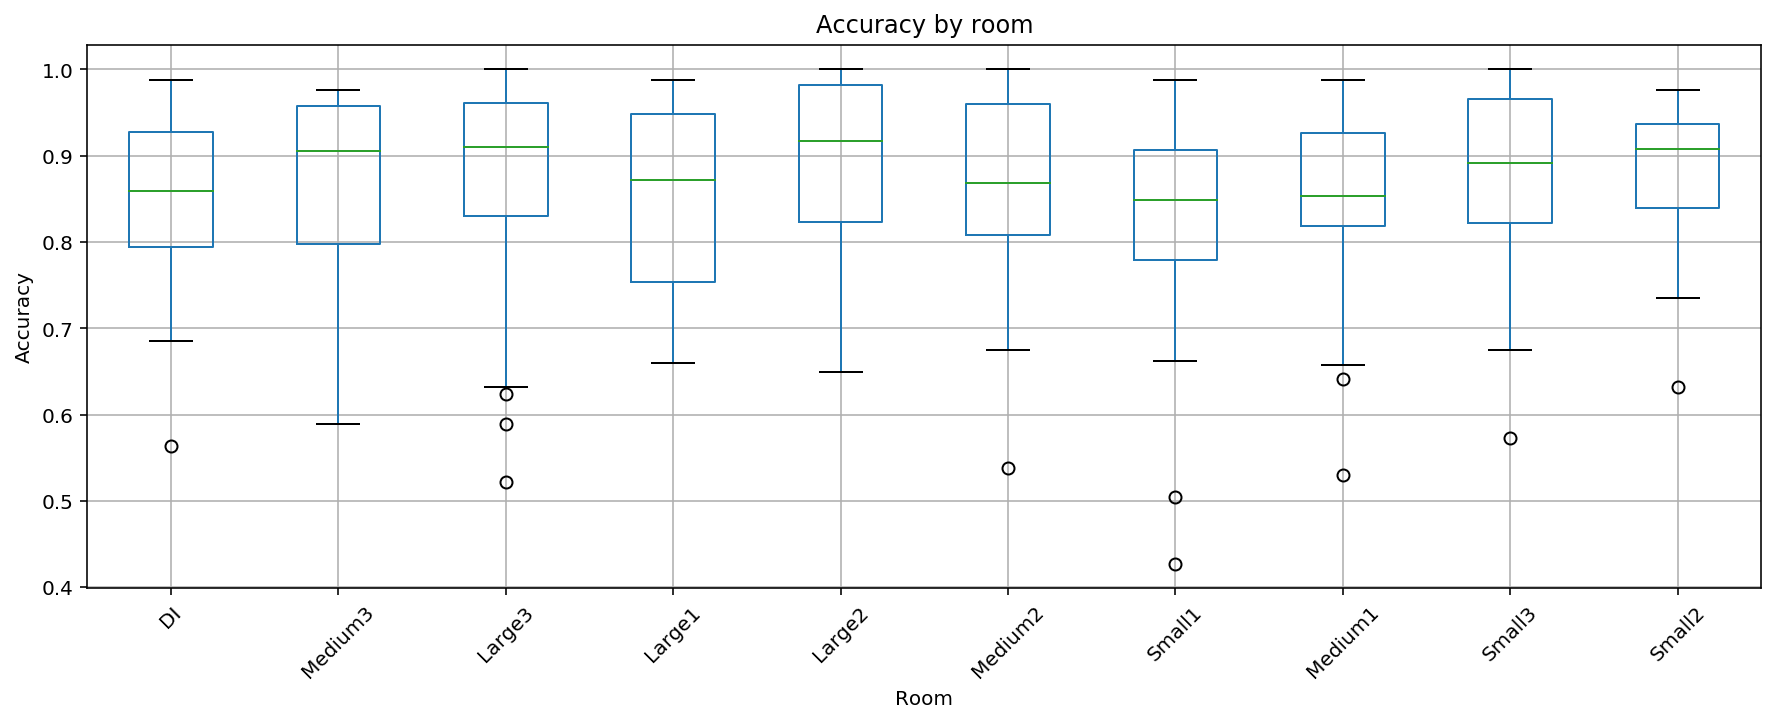

In [11]:
result = accuracy_by_source(test_segments,pred, test_audios)

cols = [c  for c in result.columns if (c != 'Song') and (c!='Performance')]

result.boxplot(column=cols,fontsize='medium',rot=45,figsize = (15,5))
plt.title('Accuracy by room')
plt.xlabel('Room')
plt.ylabel('Accuracy')
plt.show()

#### Accuracy by performance and room

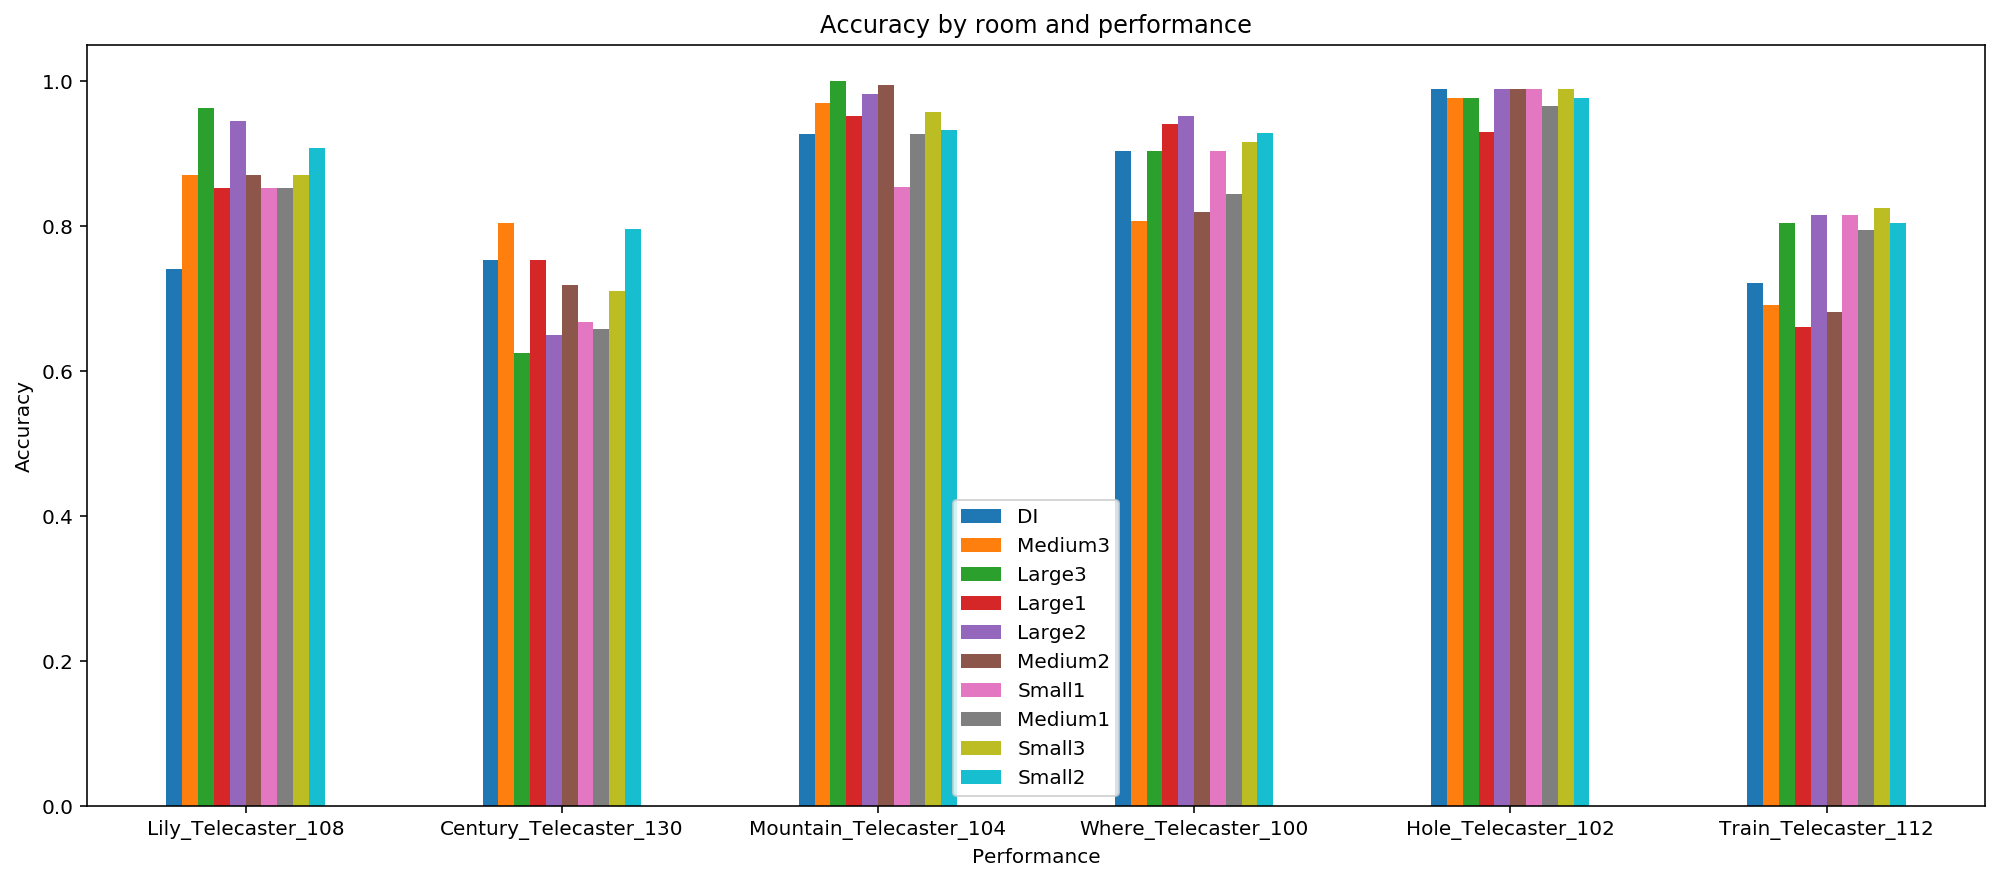

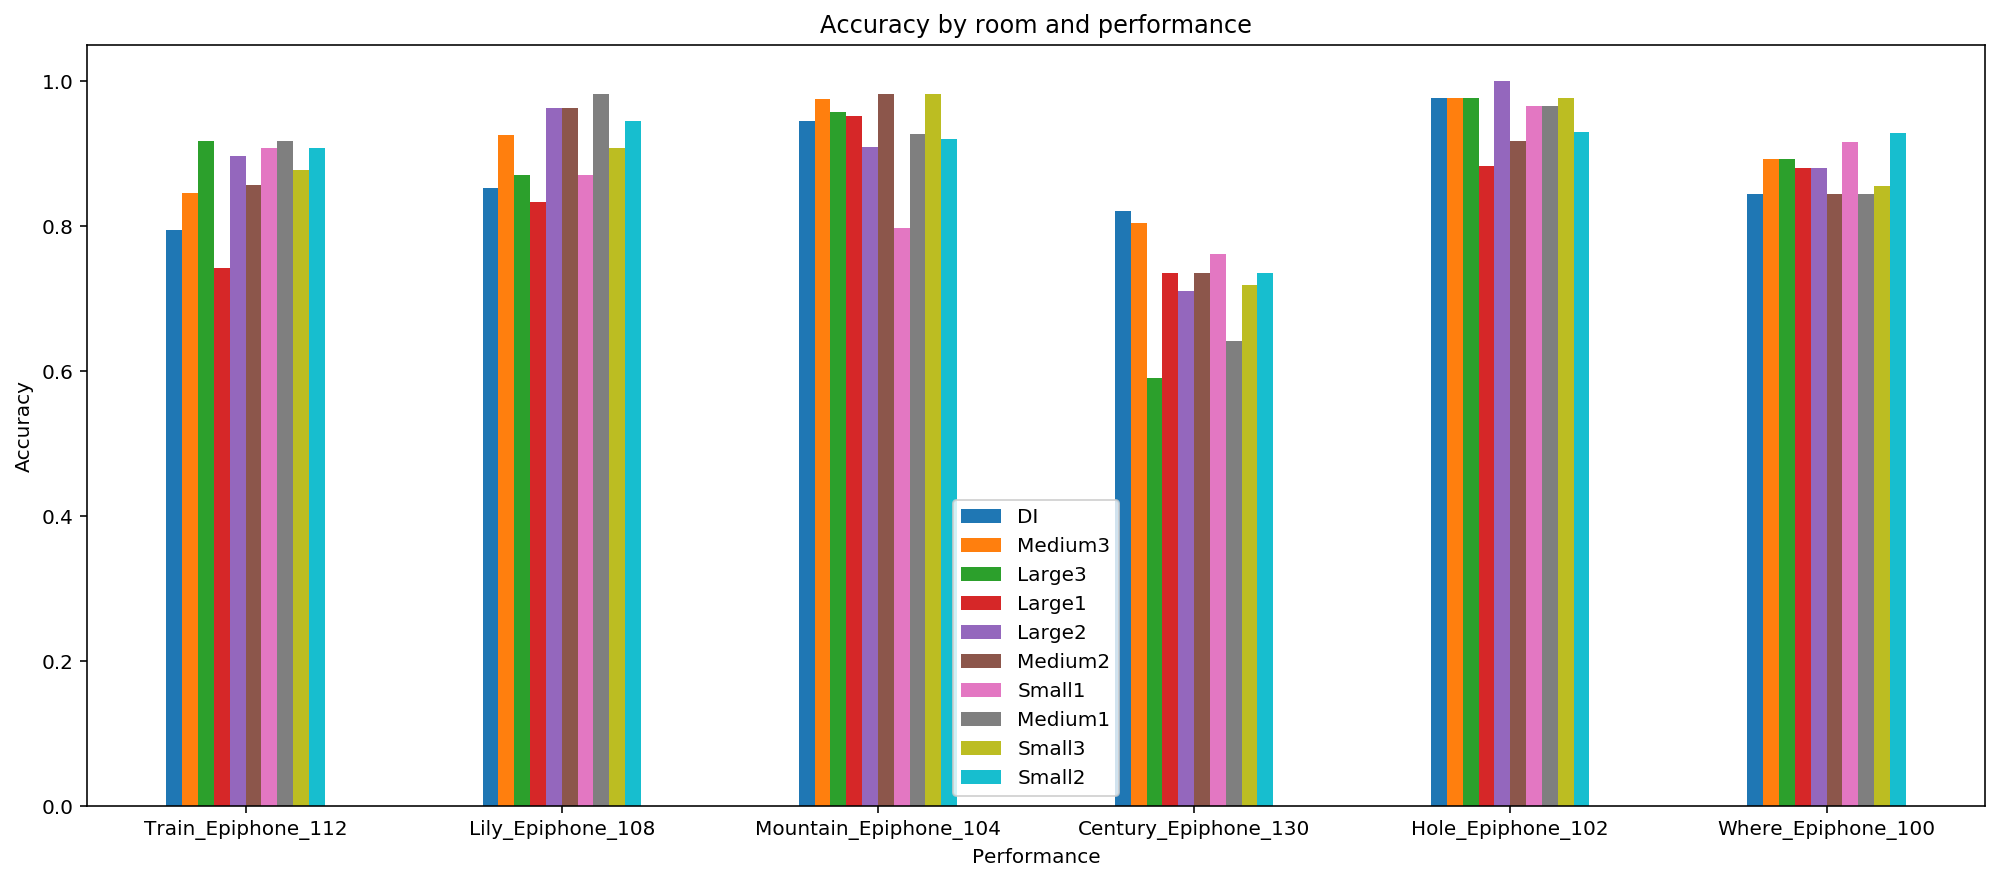

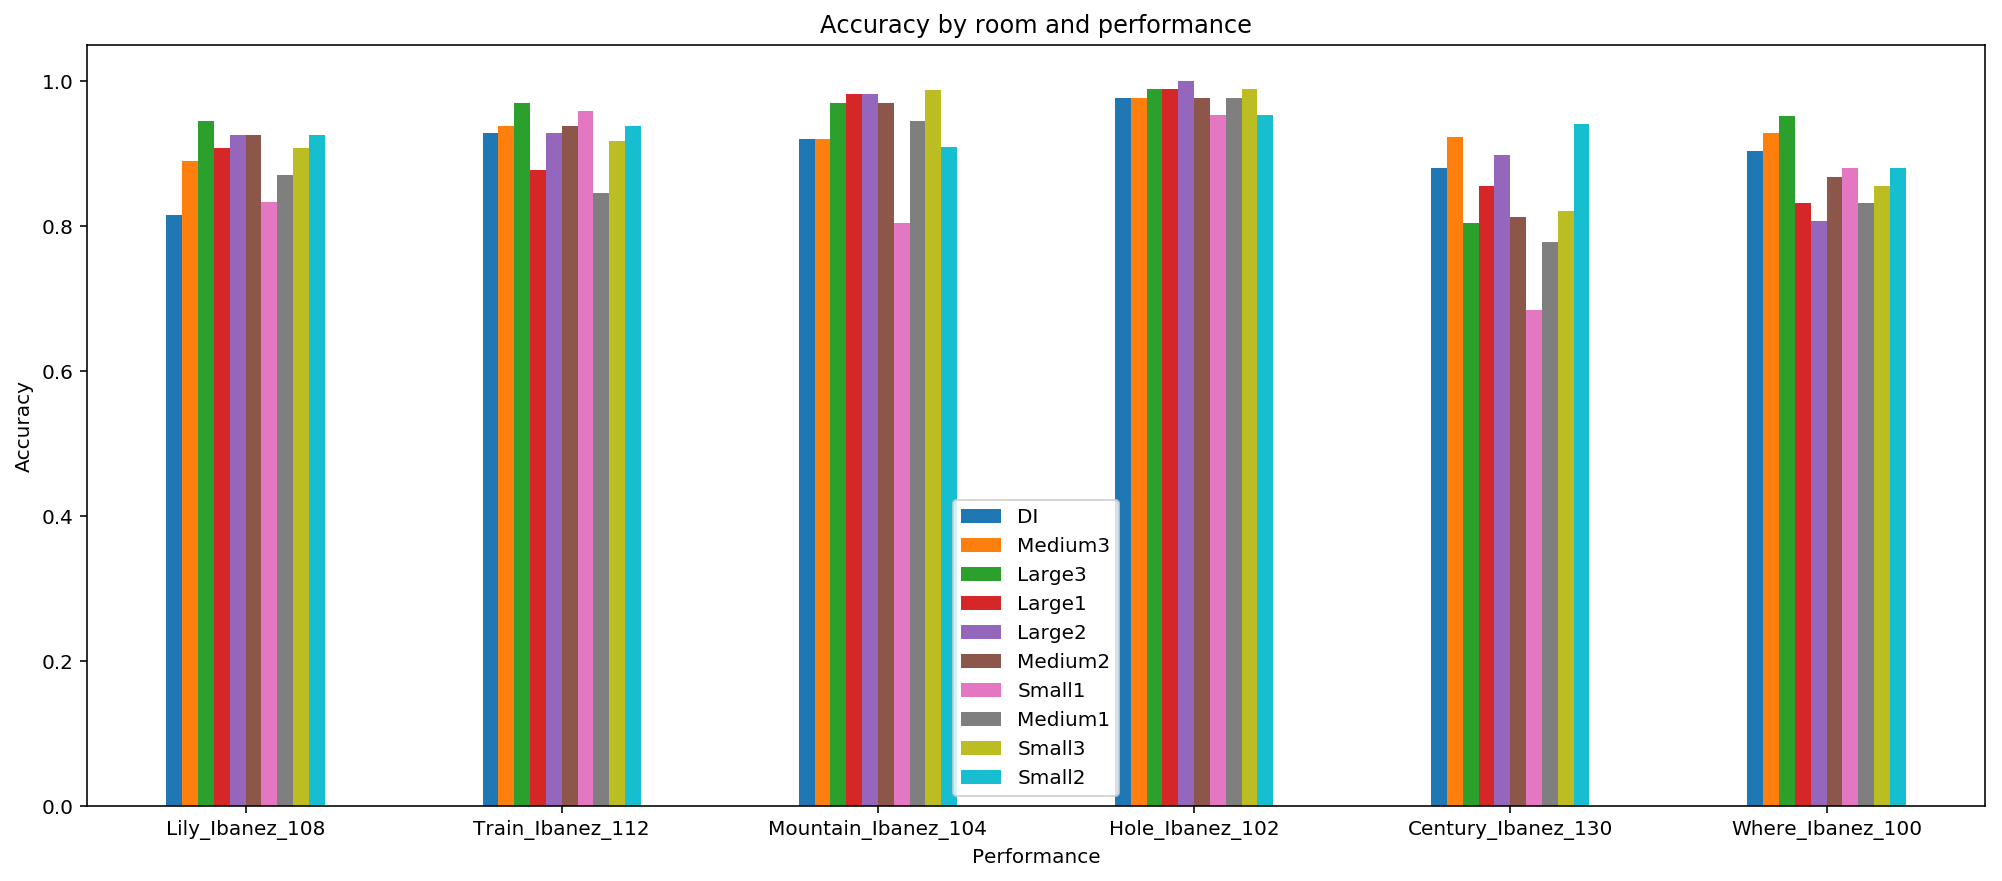

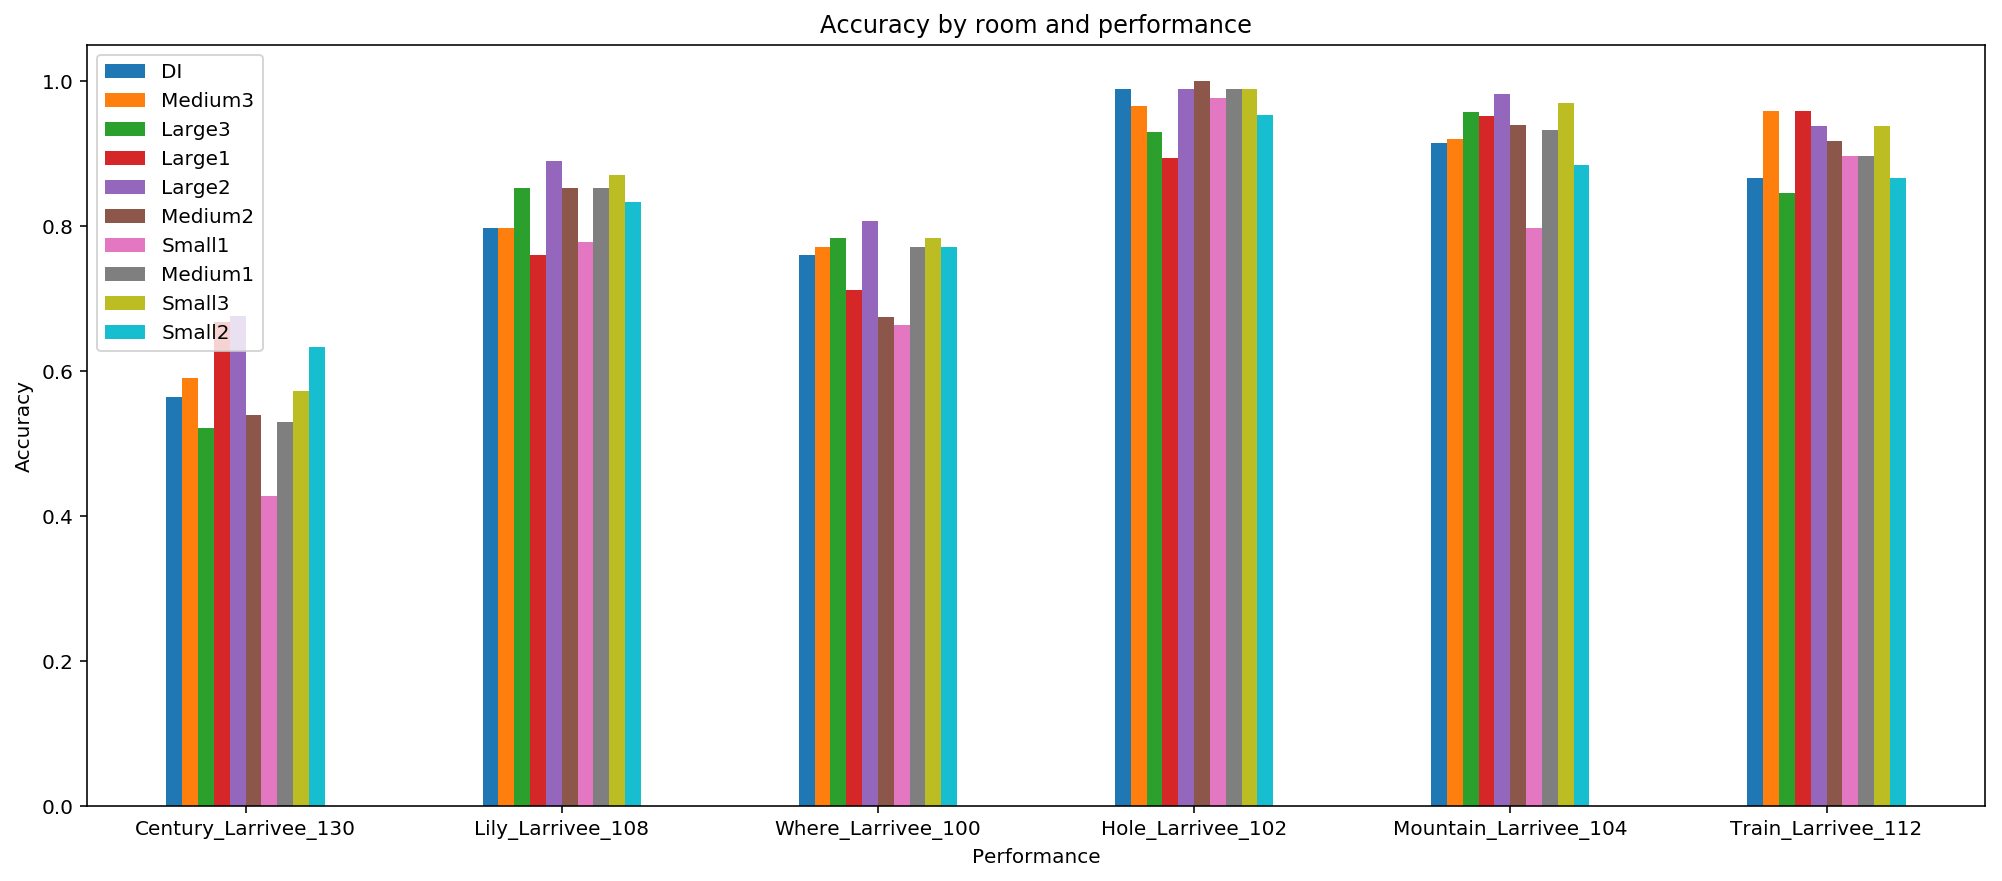

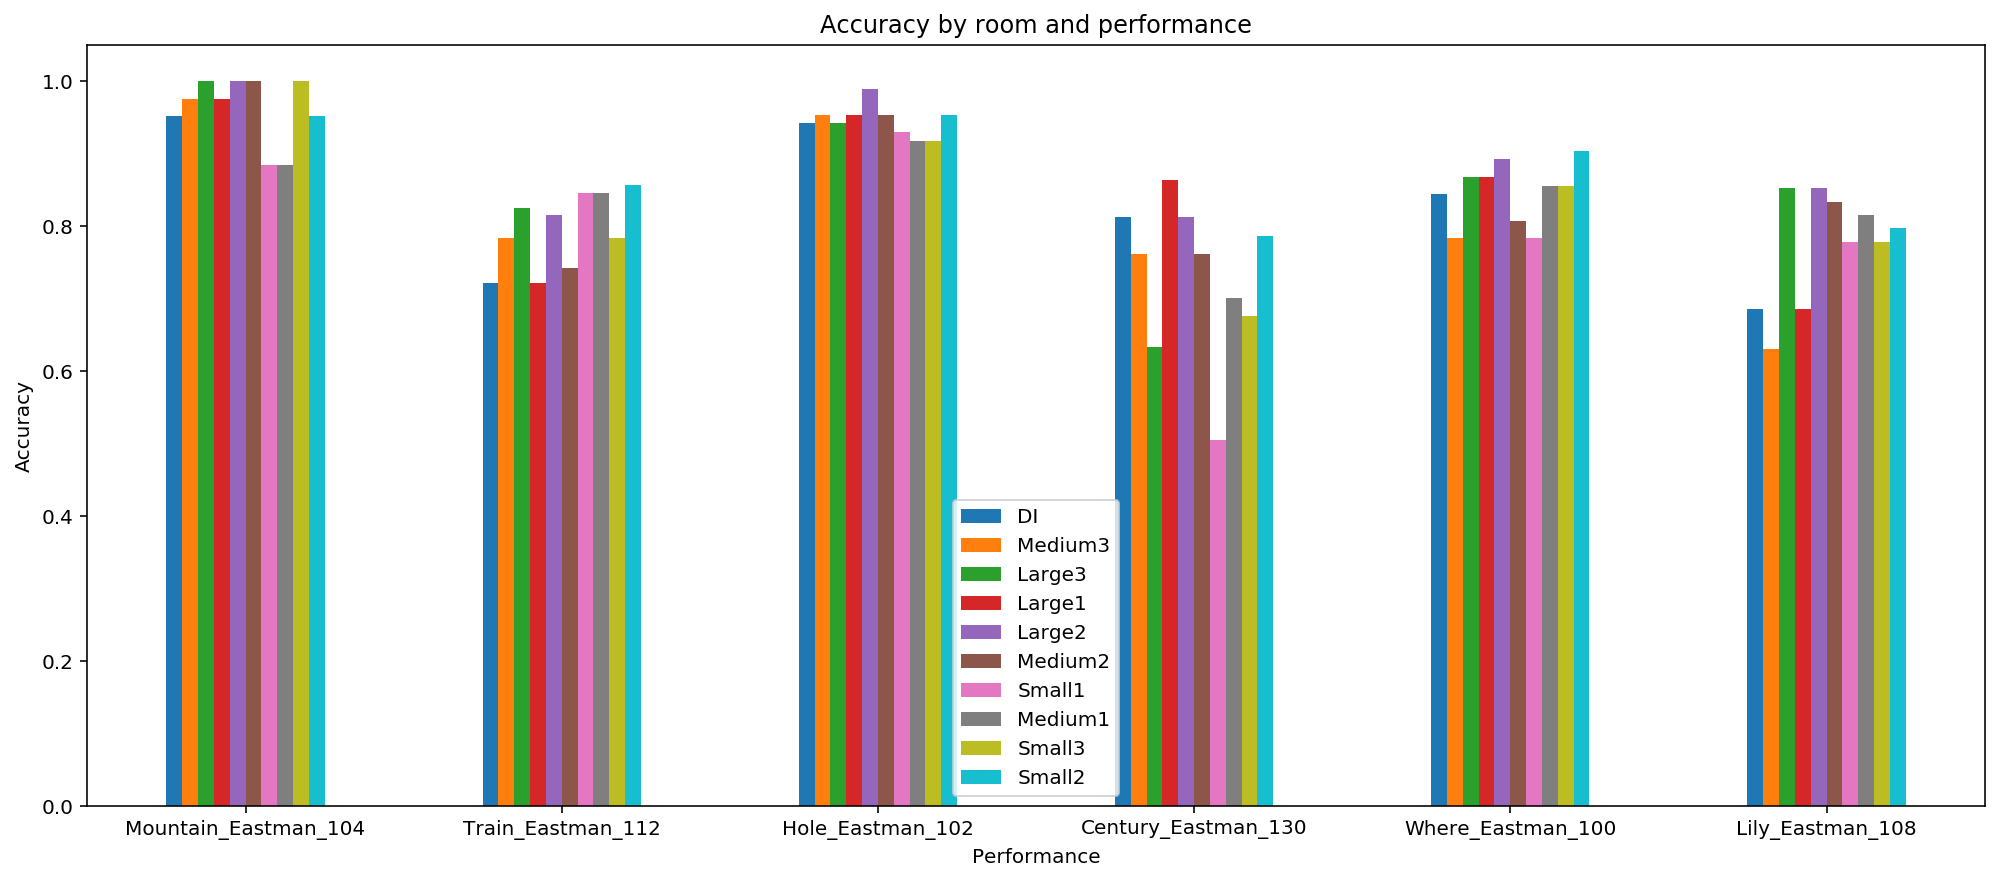

In [12]:
guitarres = ['Telecaster','Epiphone','Ibanez','Larrivee','Eastman']
for g in guitarres:
    performances = ['Century_'+g,'Lily_'+g,'Train_'+g,'Mountain_'+g,'Where_'+g,'Hole_'+g]
    result[result['Performance'].isin(performances)].plot.bar(fontsize='medium',rot=0,figsize = (17,7))

    plt.title('Accuracy by room and performance')
    plt.xlabel('Performance')
    plt.ylabel('Accuracy')

    plt.show()

#### Comparing chroma grams

In [14]:
import importlib
import test_pipeline_tools.METRICS as met
importlib.reload(met)
from test_pipeline_tools.METRICS import Individual_Metrics

from test_pipeline_tools.Segments_Loader import song_2_anno, ex_2_id
import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

In [17]:
recordings = ['../Databases/Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Large3.wav',
             '../Databases/Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Medium3.wav',
             '../Databases/Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Small1.wav']

../Databases/Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Large3.wav


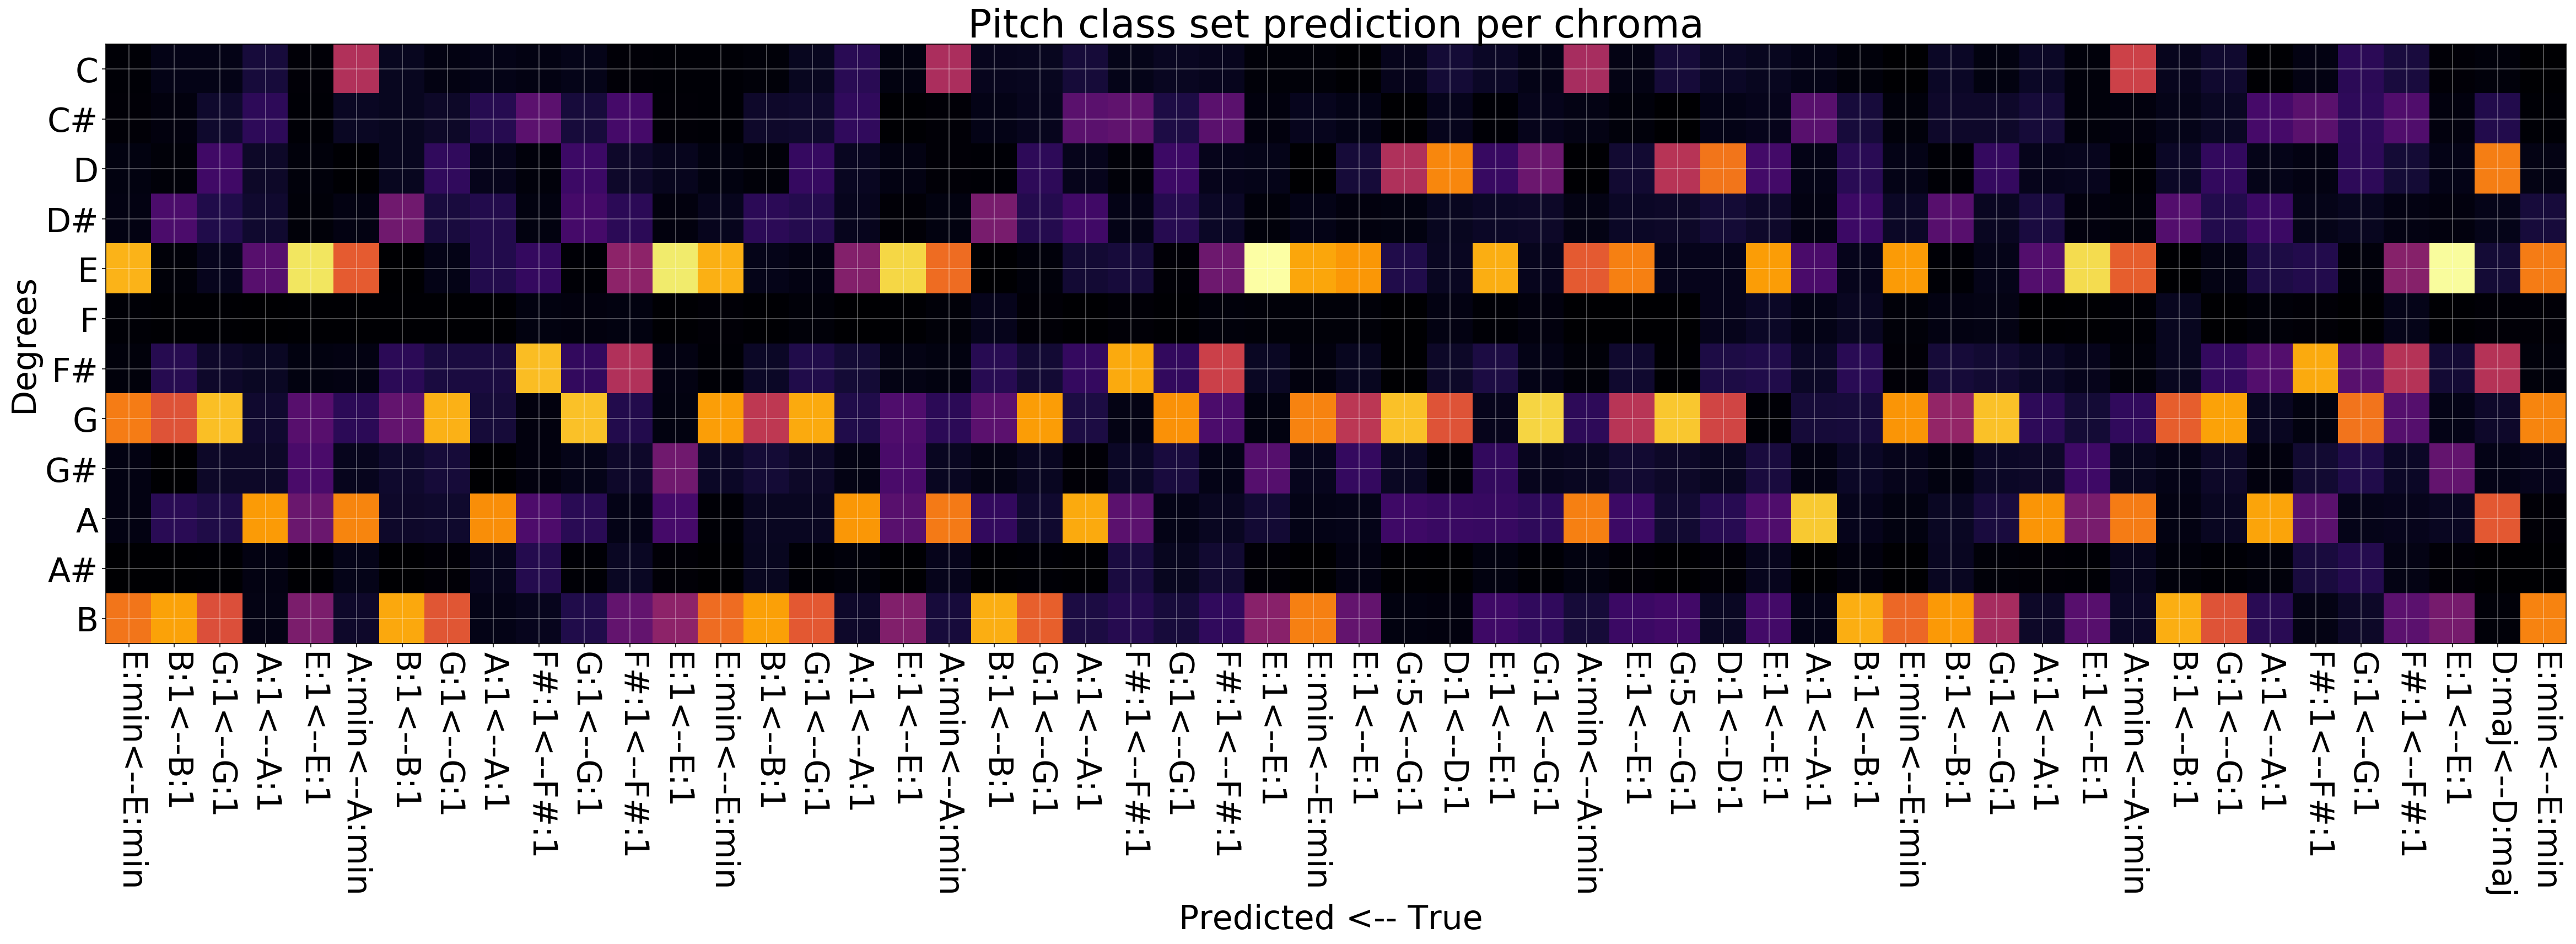

../Databases/Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Medium3.wav


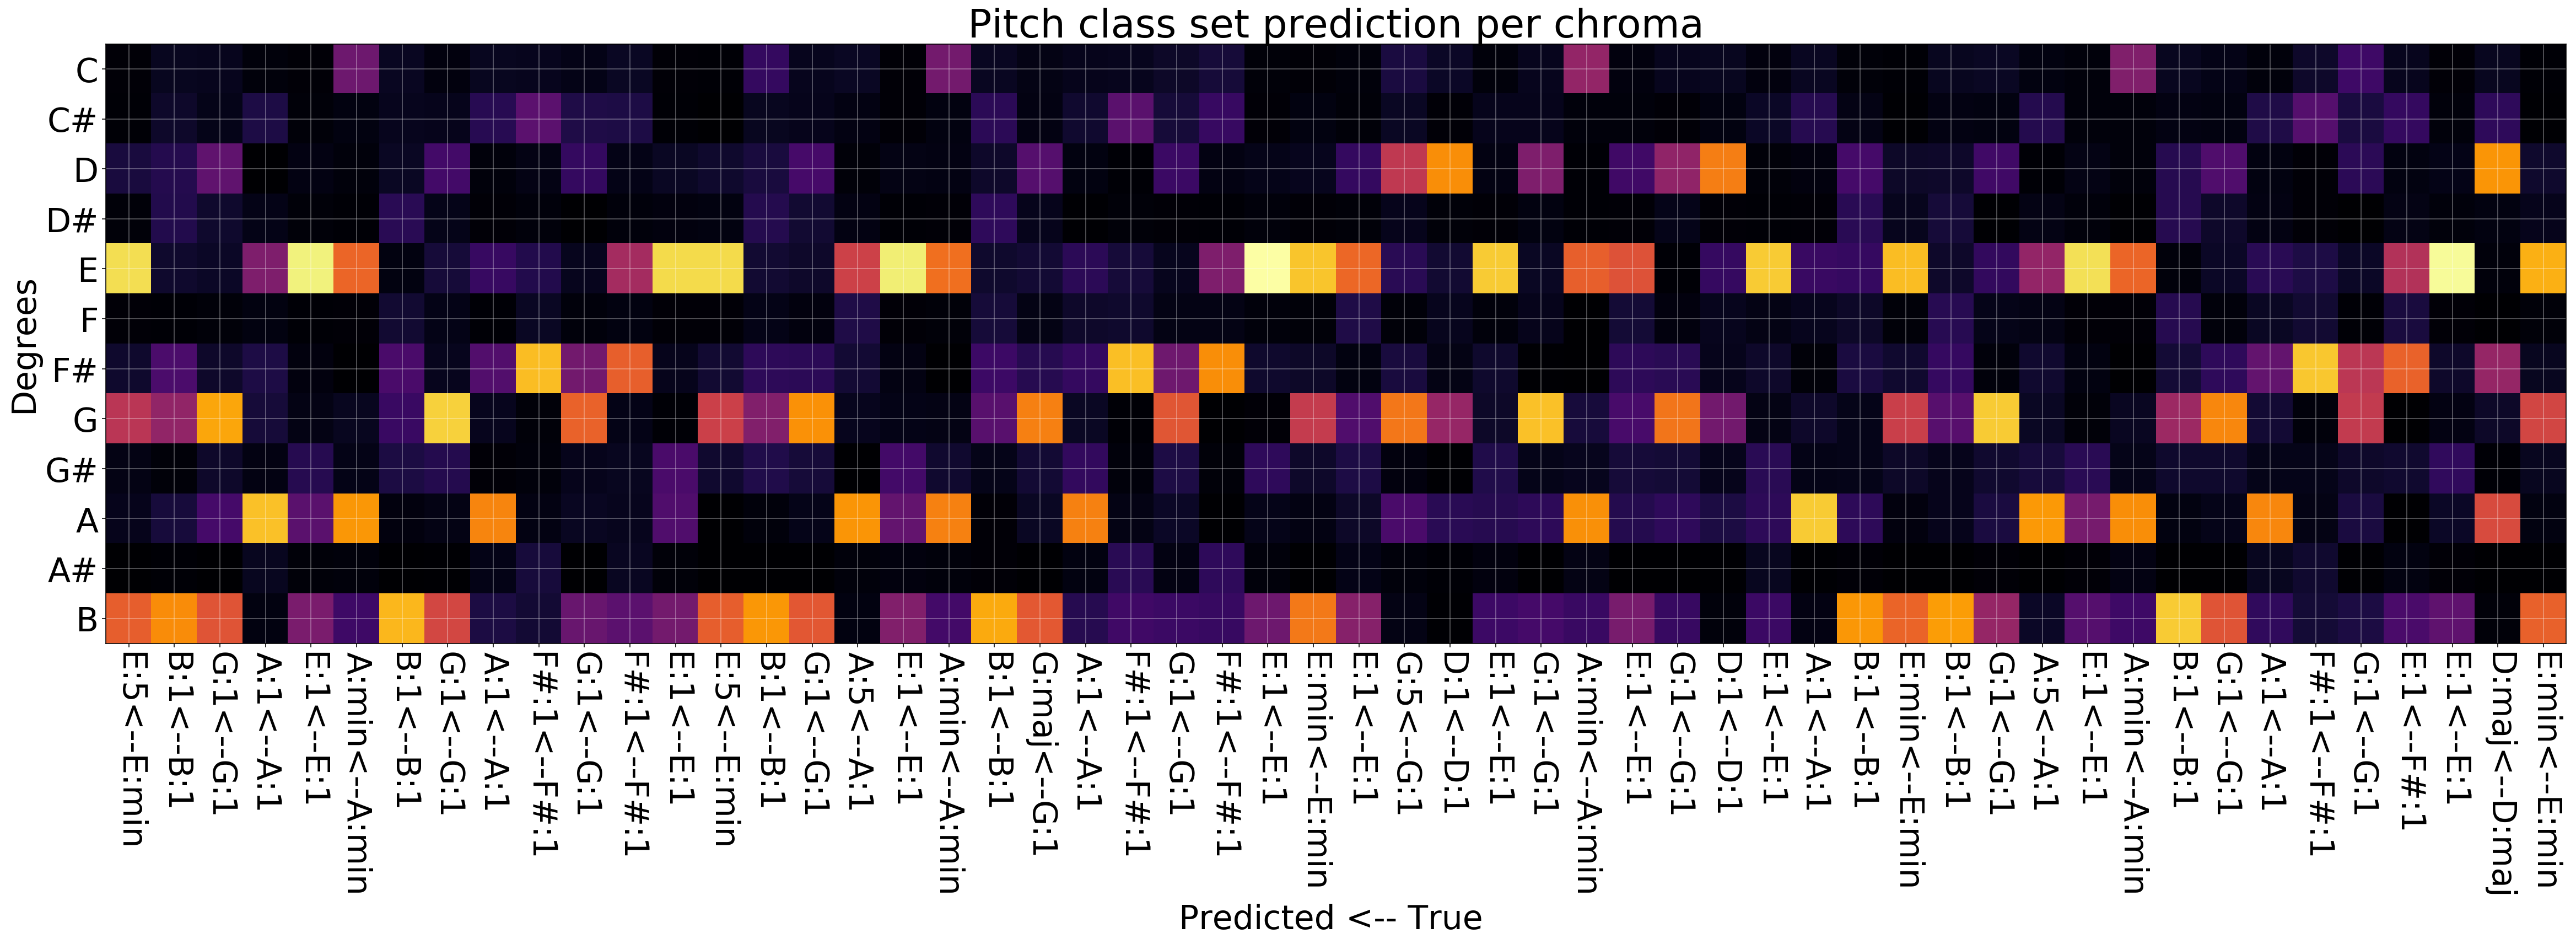

../Databases/Augmented_database/MeldaProduction_Rooms/Lily_Telecaster_108_Small1.wav


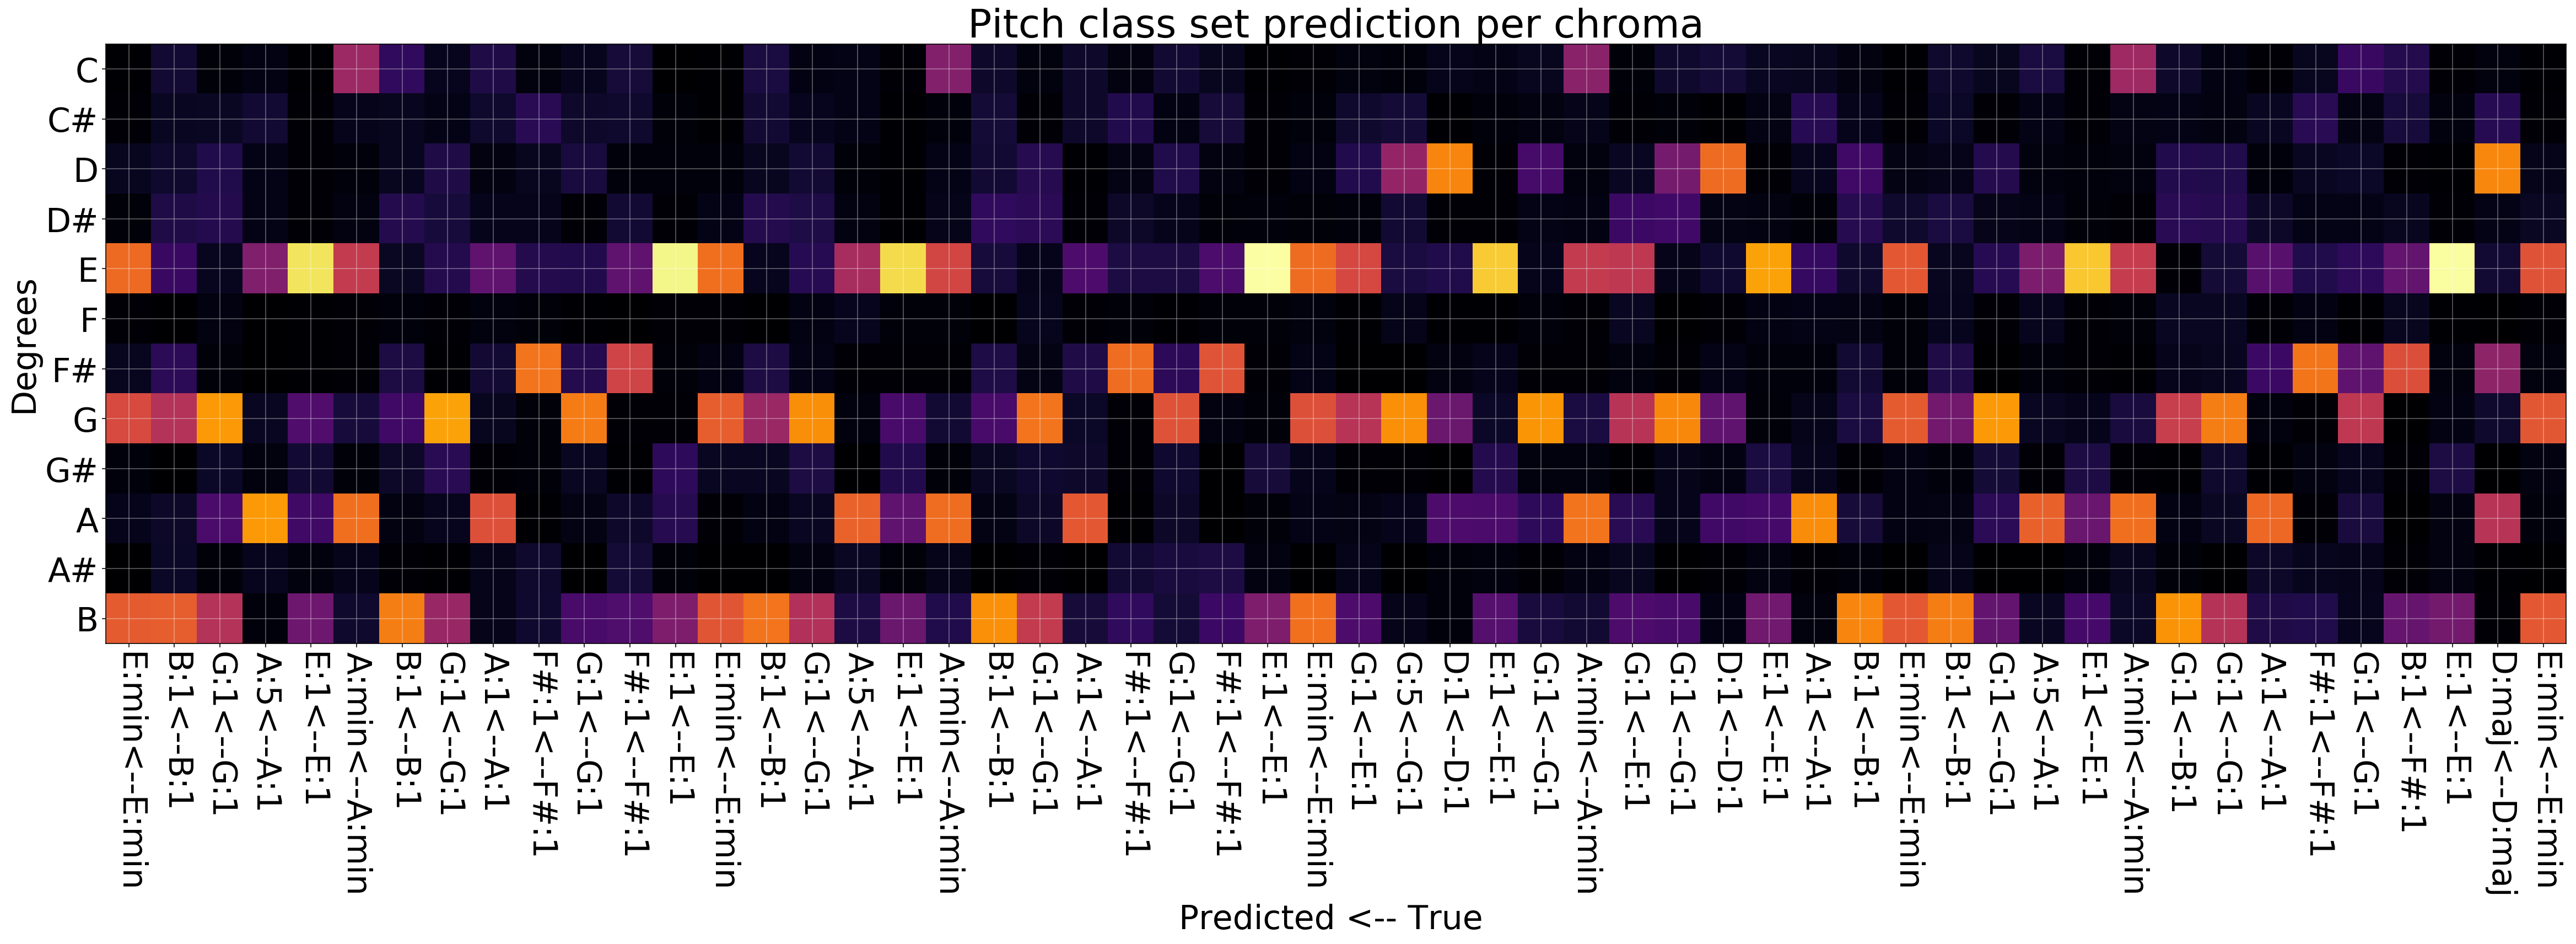

In [19]:
for rec in recordings:
    plt.rcParams.update({'font.size':10})
    print(rec)
    song = rec.split('/')[-1].split('_')[0]
    
    IM = Individual_Metrics(song_2_anno[song],rec,model_path+model_name+'.pkl', labels_kinds = ['maj','min','5','1'],
                           info =False, debug = False)
    IM.plot_chroma_scores()
